In [ ]:
#원격 연결
from google.colab import drive

drive.mount('/content/drive')
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password="1599")

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# 데이터 로드
datasets = PreprocessData(valid_size=0.15, random_state=42, scaling=False)
tr_images, tr_ohe_labels, val_images, val_ohe_labels, test_images, test_ohe_labels = datasets.preprocess_data()
# 모델 설계
model = CnnModel.create_model(verbose=True)

# ImageDataGenerator 객체 생성 -> 적용할 증강 기법 설정
tr_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1/255.0, rotation_range=0.45,
                           zoom_range=[0.5, 1.5])
val_gen = ImageDataGenerator(rescale=1/255.0)

# Numpy Array Iterator 객체 생성하여 모델 인풋으로 배치 사이즈만큼 집어넣을 준비
flow_tr_gen = tr_gen.flow(x=tr_images, y=tr_ohe_labels, batch_size=64, shuffle=True)
flow_val_gen = val_gen.flow(x=val_images, y=val_ohe_labels, batch_size=65, shuffle=False)

# Callaback 설정
rlr_call = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=4, verbose=1)
es_call = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)

# 모델 compile
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
tr_hist = model.fit(flow_tr_gen, epochs=20, validation_data=flow_val_gen, callbacks=[rlr_call, es_call])

# 평가
test_gen = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_gen.flow(x=test_images, y=test_ohe_labels, batch_size=32, shuffle=False)
test_hist = model.evaluate(flow_test_gen)

In [ ]:
# 인공지능의 이해 이미지 제너레이타 1:1000 뻥튀기기
train_data = ImageDataGenerator(
    samplewise_center=True,
    featurewise_std_normalization = True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescal=True,
    preprocessing_function=None
)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
# from google.colab import drive

# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# 안씁니다.
# 수동으로 즐기는 원 핫 인코딩
img_path1 = './data/hw5/train/adidas'
img_path2 = './data/hw5/train/converse'
img_path3 = './data/hw5/train/nike'

catego = os.listdir(img_path1)
adidas_class = len(catego)
print('adidas:', adidas_class)

catego = os.listdir(img_path2)
converse_class = len(catego)
print('converse:', converse_class)

catego = os.listdir(img_path3)
nike_class = len(catego)
print('nike:', nike_class)

ss_list = [] # 각 237개 씩 순서는 아디다스-컨버스-나이키 순
ss = np.array([]) # shose_speices
for i in range(adidas_class):
    ss_list.append([0,0,0,1])

for i in range(converse_class):
    ss_list.append([0,0,1,0])

for i in range(nike_class):
    ss_list.append([0,1,0,0])


shose_speices = np.array(ss_list)
print(shose_speices)
np.save('./data/hw5/shose_speices.npy',shose_speices)


adidas: 237
converse: 237
nike: 237
[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


In [ ]:
#트레인 데이타셋 레이블 구성

caltech_dir = "./data/hw5/train"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
  
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(cat)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)# 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy = (X_train, X_test, y_train, y_test)
np.save("./data/hw5/shose_train.npy", xy)

adidas  파일 길이 :  237
adidas  :  ./data/hw5/train/adidas/100.jpg
converse  파일 길이 :  237
converse  :  ./data/hw5/train/converse/100.jpg
nike  파일 길이 :  237
nike  :  ./data/hw5/train/nike/100.jpg


In [ ]:
# 테스트셋 전처리

caltech_dir = "./data/hw5/test"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(cat)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True) # 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy1 = (X_train, X_test, y_train, y_test)
np.save("./data/hw5/shose_test.npy", xy1)

adidas  파일 길이 :  38
adidas  :  ./data/hw5/test/adidas/0.jpg
converse  파일 길이 :  38
converse  :  ./data/hw5/test/converse/0.jpg
nike  파일 길이 :  38
nike  :  ./data/hw5/test/nike/0.jpg


In [ ]:
# 기본 데이타 셋 확정

X_, X_1, y_, y_1 = np.load("./data/hw5/shose_train.npy",allow_pickle=True)
X_train = np.append(X_,X_1,axis=0)
y_train = np.append(y_,y_1,axis=0)

X_2, X_test, y_2, y_test = np.load("./data/hw5/shose_test.npy",allow_pickle=True)
X_test = np.append(X_test,X_2,axis=0)
y_test = np.append(y_test,y_2,axis=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 240, 240, 3)
(114, 240, 240, 3)
(711,)
(114,)


In [ ]:
# 라벨 원-핫 인코딩

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
 
categories = ["adidas", "converse", "nike"]

token = Tokenizer()
token.fit_on_texts(y_test)

token1 = Tokenizer()
token1.fit_on_texts(y_train)
#print('word index: {}'.format(token.word_index))
y_ = token.texts_to_sequences(y_test)
y_1 = token1.texts_to_sequences(y_train)
y_test = tf.keras.utils.to_categorical(y_, len(token.word_index) + 1) # 길이를 줘야하는데 벡터 맨 앞에 0이 필요해서 한 칸 더 추가.
y_train = tf.keras.utils.to_categorical(y_1, len(token.word_index) + 1)
print(y_train)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
datasets = PreprocessData(valid_size=0.15, random_state=42, scaling=False)
tr_images, tr_ohe_labels, val_images, val_ohe_labels, test_images, test_ohe_labels = datasets.preprocess_data()

tr_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1/255.0, rotation_range=0.45,
                           zoom_range=[0.5, 1.5])
val_gen = ImageDataGenerator(rescale=1/255.0)

# Numpy Array Iterator 객체 생성하여 모델 인풋으로 배치 사이즈만큼 집어넣을 준비
flow_tr_gen = tr_gen.flow(x=tr_images, y=tr_ohe_labels, batch_size=64, shuffle=True)
flow_val_gen = val_gen.flow(x=val_images, y=val_ohe_labels, batch_size=65, shuffle=False)

In [ ]:
# 1:1000 배 뻥튀기

train_data = ImageDataGenerator(
    rescale=1/255.0,
    samplewise_center=True,
    featurewise_std_normalization = True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=None
)

In [ ]:
X_train_gen = train_data.flow(x=X_train, y=y_train,batch_size=32, shuffle=True)

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


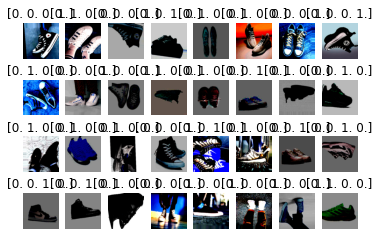

In [ ]:
import cv2
augs = X_train_gen.__getitem__(8)

plt.figure()
for i, img in enumerate(augs[0]):
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.title(augs[1][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())